## Statistic Some Infomation from NIH Chest X-Ray Dataset

NIH Chest X-Ray Dataset: [NIH-Chest-XRay|Kaggle](https://www.kaggle.com/datasets/nih-chest-xrays/data)

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[TRAIN] Total images: 76524
[TRAIN] Disease counts:
Atelectasis            7333
Cardiomegaly           1491
Effusion               7641
Infiltration          12151
Mass                   3534
Nodule                 4175
Pneumonia               760
Pneumothorax           2331
Consolidation          2516
Edema                  1203
Emphysema              1263
Fibrosis               1100
Pleural_Thickening     1962
Hernia                  125
dtype: int64
[Saved] plots/nih14_train_distribution.png
[VAL] Total images: 10000
[VAL] Disease counts:
Atelectasis            947
Cardiomegaly           216
Effusion              1018
Infiltration          1631
Mass                   500
Nodule                 533
Pneumonia              116
Pneumothorax           306
Consolidation          336
Edema                  175
Emphysema              160
Fibrosis               151
Pleural_Thickening     280
Hernia                  16
dtype: int64
[Saved] plots/nih14_val_distribution.png
[TEST] Total images:

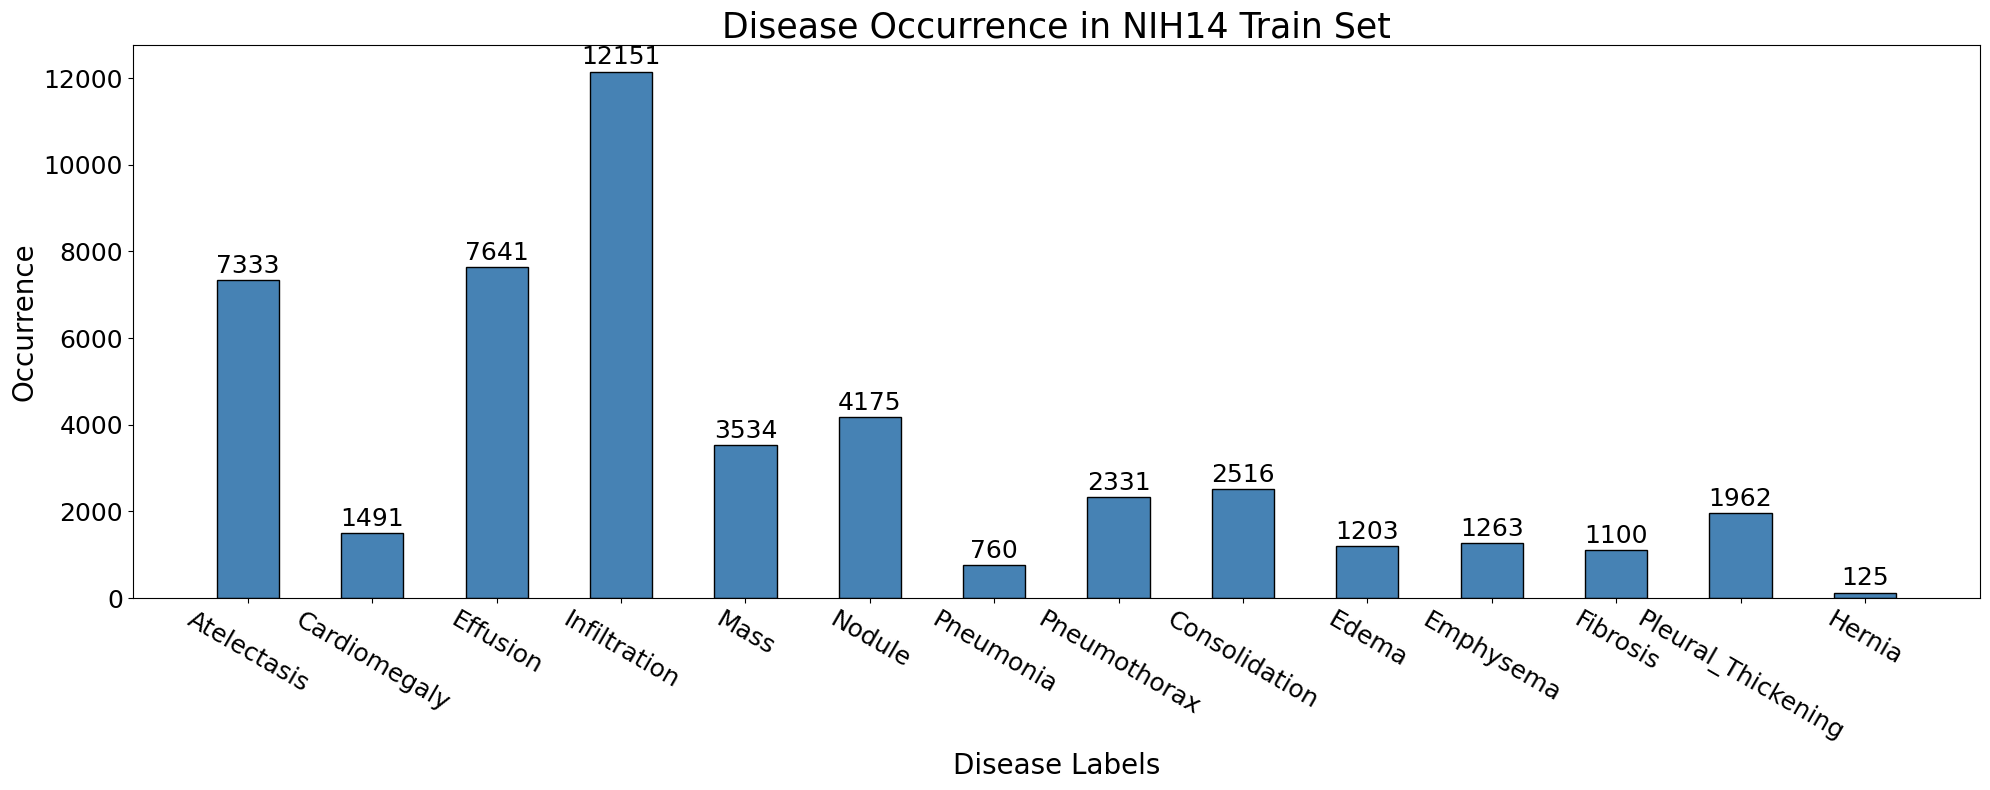

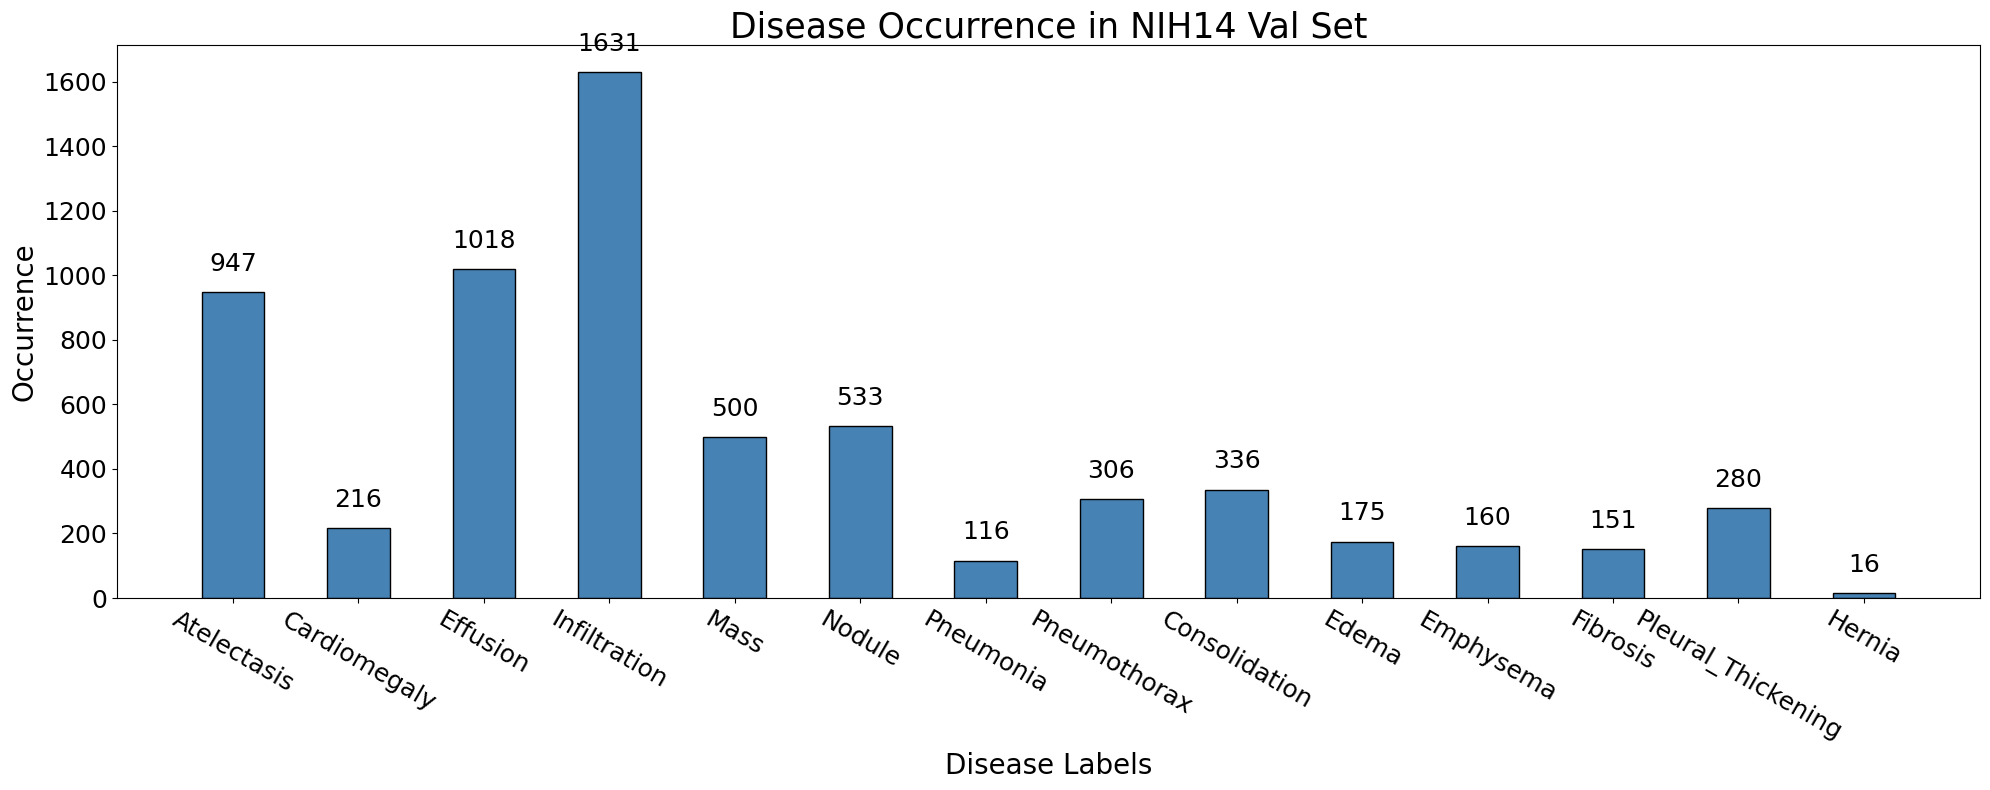

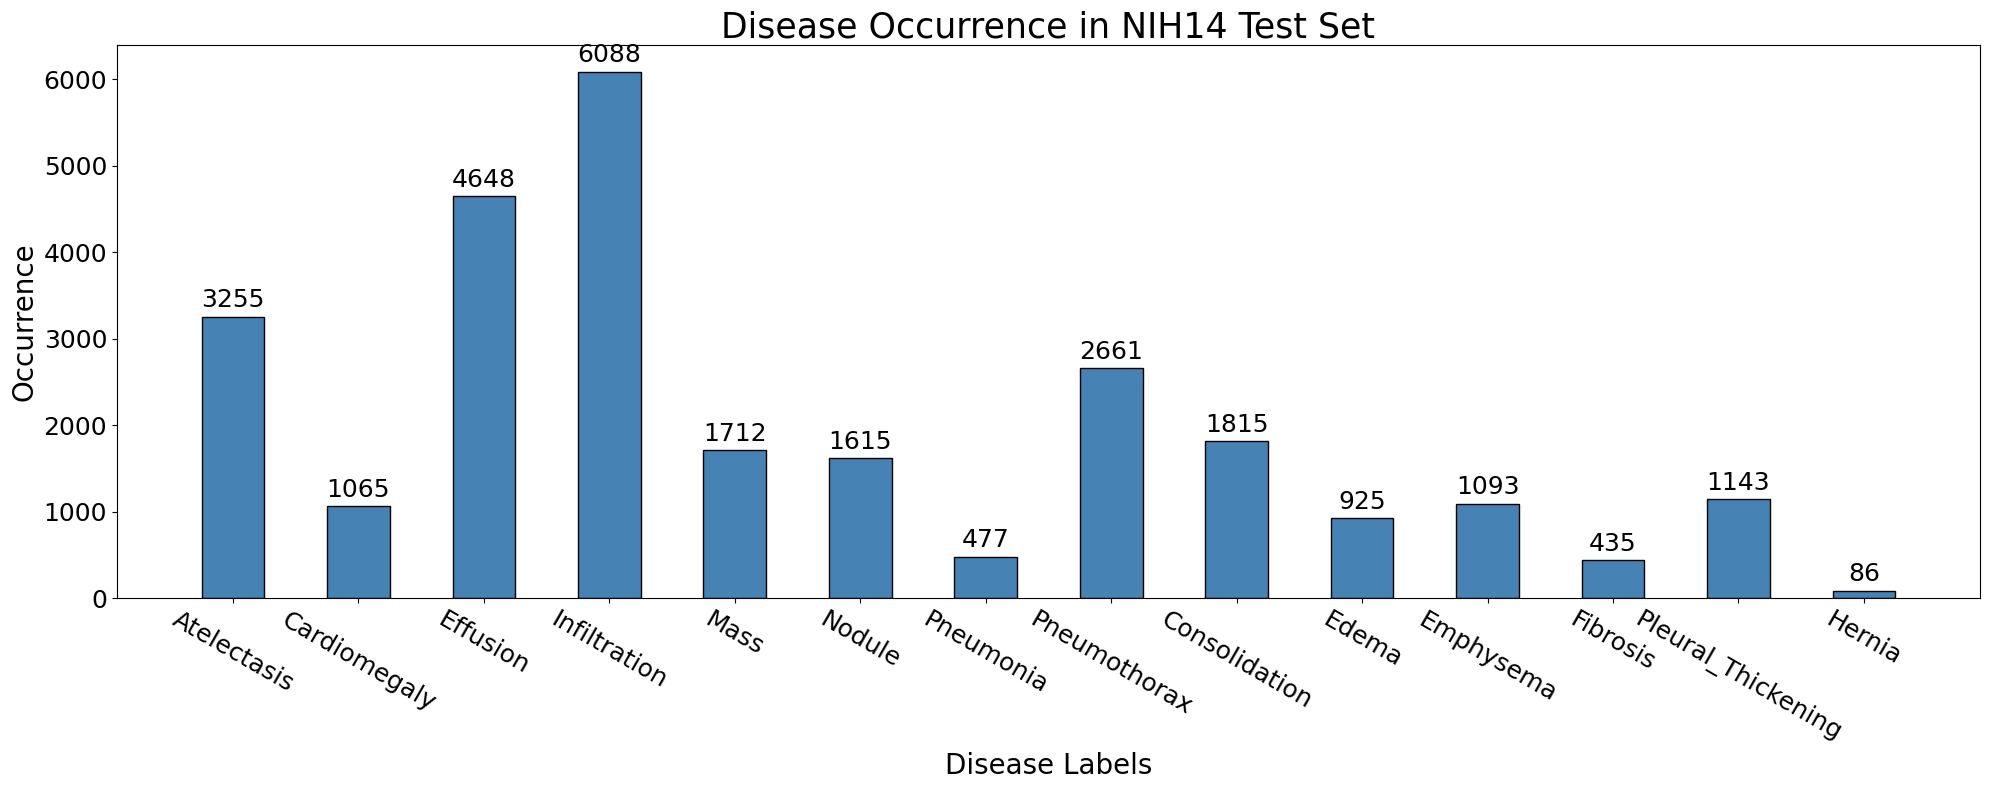

In [ ]:
# Set path
data_dir = "../files/nih14_label"
splits = ["train", "val", "test"]

# Plot function
def plot_disease_distribution(df, split_name, save_dir=None):
    disease_list = df.columns[1:].tolist()
    disease_counts = df[disease_list].sum().astype(int)

    print(f"[{split_name.upper()}] Total images: {len(df)}")
    print(f"[{split_name.upper()}] Disease counts:\n{disease_counts}")

    # Plot figure
    plt.figure(figsize=(20, 8))
    bars = plt.bar(disease_list, disease_counts, color="steelblue", edgecolor="k", width=0.5)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval),
                 ha="center", va="bottom", fontsize=18)

    plt.xticks(rotation=-30, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Disease Labels", fontsize=20)
    plt.ylabel("Occurrence", fontsize=20)
    plt.title(f"Disease Occurrence in NIH14 {split_name.capitalize()} Set", fontsize=25)
    plt.tight_layout()

    # Save and show
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, f"nih14_{split_name}_distribution.png")
        plt.savefig(save_path, dpi=300)
        print(f"[Saved] {save_path}")
    else:
        plt.show()

# Recursive
for split in splits:
    csv_path = os.path.join(data_dir, f"{split}_label.csv")
    df = pd.read_csv(csv_path)
    plot_disease_distribution(df, split_name=split, save_dir="plots")

### No finding, One label,and Multi label

+ train dataset: No finding: 44761, One label: 20284, Multi-label: 11479
+ val dataset: No finding: 5739, One label: 2687, Multi-label: 1574
+ test dataset: No finding: 9912, One label: 8002, Multi-label: 7682

In [11]:
# Set the directory containing label CSV files
data_dir = "../files/nih14_label"
splits = ["train", "val", "test"]

# Initialize counters
total_samples = 0
total_no_finding = 0
total_one_label = 0
total_multi_label = 0

# Process each split
for split in splits:
    csv_path = os.path.join(data_dir, f"{split}_label.csv")
    df = pd.read_csv(csv_path)
    label_df = df.iloc[:, 1:]  # Exclude image name column

    # Count number of labels per image
    label_counts = label_df.sum(axis=1)

    # Count label distribution
    no_finding = (label_counts == 0).sum()
    one_label = (label_counts == 1).sum()
    multi_label = (label_counts > 1).sum()

    print(f"[{split.upper()}] Total samples: {len(label_counts)}")
    print(f"[{split.upper()}] No Finding: {no_finding}")
    print(f"[{split.upper()}] One-label: {one_label}")
    print(f"[{split.upper()}] Multi-label: {multi_label}")
    print("-" * 40)

    # Accumulate totals
    total_samples += len(label_counts)
    total_no_finding += no_finding
    total_one_label += one_label
    total_multi_label += multi_label

# Summary for all splits
print(f"[ALL SPLITS] Total samples: {total_samples}")
print(f"[ALL SPLITS] No Finding: {total_no_finding}")
print(f"[ALL SPLITS] One-label: {total_one_label}")
print(f"[ALL SPLITS] Multi-label: {total_multi_label}")

[TRAIN] Total samples: 76524
[TRAIN] No Finding: 44761
[TRAIN] One-label: 20284
[TRAIN] Multi-label: 11479
----------------------------------------
[VAL] Total samples: 10000
[VAL] No Finding: 5739
[VAL] One-label: 2687
[VAL] Multi-label: 1574
----------------------------------------
[TEST] Total samples: 25596
[TEST] No Finding: 9912
[TEST] One-label: 8002
[TEST] Multi-label: 7682
----------------------------------------
[ALL SPLITS] Total samples: 112120
[ALL SPLITS] No Finding: 60412
[ALL SPLITS] One-label: 30973
[ALL SPLITS] Multi-label: 20735


### Count label co-occurrence in Dataset

Label co-occurrence refers to the co-occurrence between findings. Counting this information helps to obtain prior knowledge of co-occurrence between diseases.

Raw co-occurrence matrix (int):
[[ 7333   173  1848  1885   440   357   152   327   689   130   224   154
    268    24]
 [  173  1491   546   248    57    56    14    15    62    49    25    25
     57     5]
 [ 1848   546  7641  2121   727   527   142   391   683   303   182   121
    470    13]
 [ 1885   248  2121 12151   652   907   289   353   623   516   202   229
    376    19]
 [  440    57   727   652  3534   514    30   182   325    58   104    69
    242    15]
 [  357    56   527   907   514  4175    36   141   271    67    56   102
    238     5]
 [  152    14   142   289    30    36   760    11    54   131     9     9
     26     0]
 [  327    15   391   353   182   141    11  2331    98    13   262    36
    117     1]
 [  689    62   683   623   325   271    54    98  2516    88    51    43
    131     1]
 [  130    49   303   516    58    67   131    13    88  1203    13     7
     32     1]
 [  224    25   182   202   104    56     9   262    51    13  1263    14
    

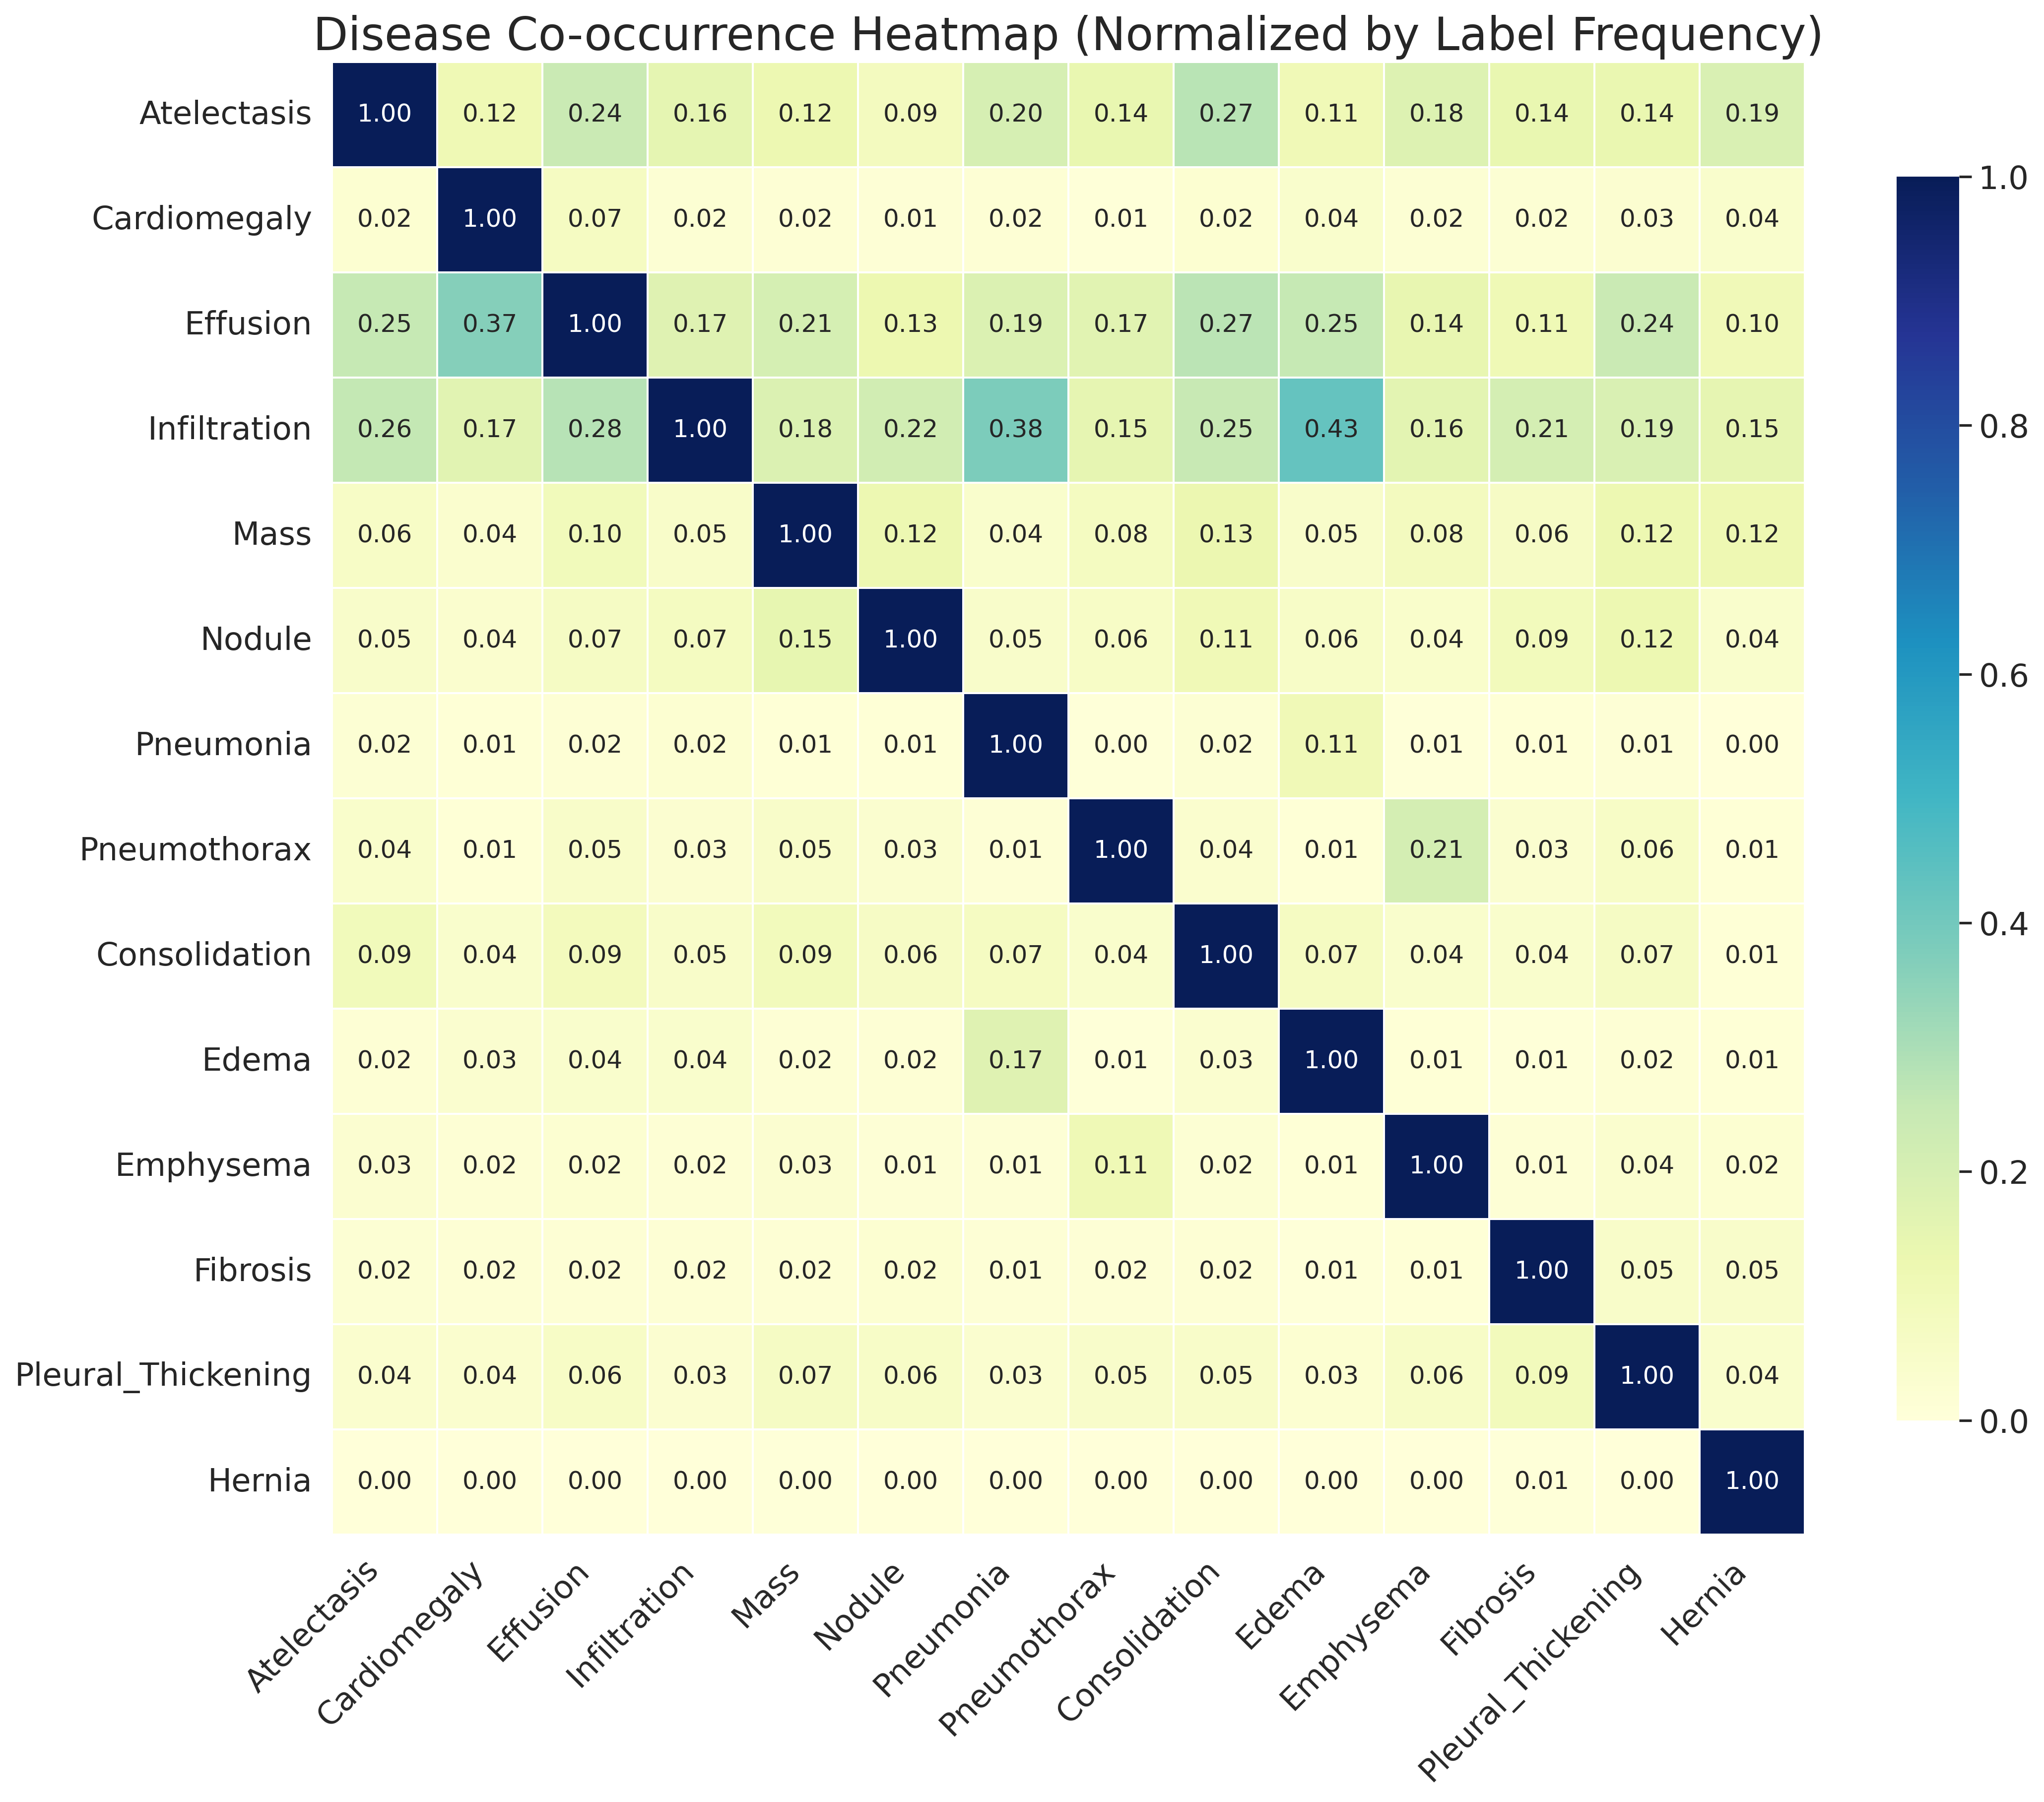

In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Config ===
csv_path = "../files/nih14_label/train_label.csv"
finding_list = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass',
                'Nodule', 'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema',
                'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
num_classes = len(finding_list)

# === Load data ===
with open(csv_path, "r") as f:
    lines = f.read().splitlines()[1:]  # skip header

# === Initialize co-occurrence matrix ===
co_mat = np.zeros((num_classes, num_classes), dtype=np.float32)

# === Build co-occurrence matrix ===
for line in lines:
    label_vals = list(map(int, line.strip().split(",")[1:]))
    label_indices = [i for i, val in enumerate(label_vals) if val == 1]

    if not label_indices:
        continue

    for i in label_indices:
        for j in label_indices:
            co_mat[i, j] += 1

# === Normalize each column by its diagonal value (i.e., conditional probability) ===
co_mat_norm = co_mat.copy()
for j in range(num_classes):
    diag = co_mat[j, j]
    if diag > 0:
        co_mat_norm[:, j] /= diag

# === Print raw count matrix (optional) ===
print("Raw co-occurrence matrix (int):")
print(np.uint32(co_mat))

# === Print normalized matrix ===
print("\nNormalized co-occurrence matrix:")
print(np.round(co_mat_norm, 3))

# === Plot ===
plt.figure(figsize=(15, 15), dpi=300)
sns.set(font_scale=1.4)

sns.heatmap(
    co_mat_norm, 
    annot=True,
    xticklabels=finding_list,
    yticklabels=finding_list,
    annot_kws={"size": 12},
    vmin=0, vmax=1,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.6}
)

plt.title("Disease Co-occurrence Heatmap (Normalized by Label Frequency)", fontsize=22)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Bbox

Bbox coordinates represent the location of the disease, in the format of [x, y, w, h]

First 10 bboxes: [[225.084745762712, 547.019216763771, 86.7796610169491, 79.1864406779661], [686.101694915254, 131.543498411017, 185.491525423729, 313.491525423729], [221.830508474576, 317.053115068856, 155.118644067797, 216.949152542373], [726.237288135593, 494.951420153602, 141.016949152542, 55.3220338983051], [660.067796610169, 569.78078654661, 200.677966101695, 78.1016949152542], [596.067796610169, 505.78078654661, 56.4067796610169, 180.067796610169], [289.084745762712, 638.137860831568, 83.5254237288136, 56.4067796610169], [494.101694915254, 577.392098119703, 271.186440677966, 154.033898305085], [676.338983050847, 512.307352356991, 98.7118644067797, 193.084745762712], [344.406779661017, 468.917521848517, 105.220338983051, 101.966101694915]]
First 10 image names: ['00013118_008.png', '00014716_007.png', '00029817_009.png', '00014687_001.png', '00017877_001.png', '00003148_004.png', '00012515_002.png', '00022098_006.png', '00014198_000.png', '00021007_000.png']
First 10 image labels

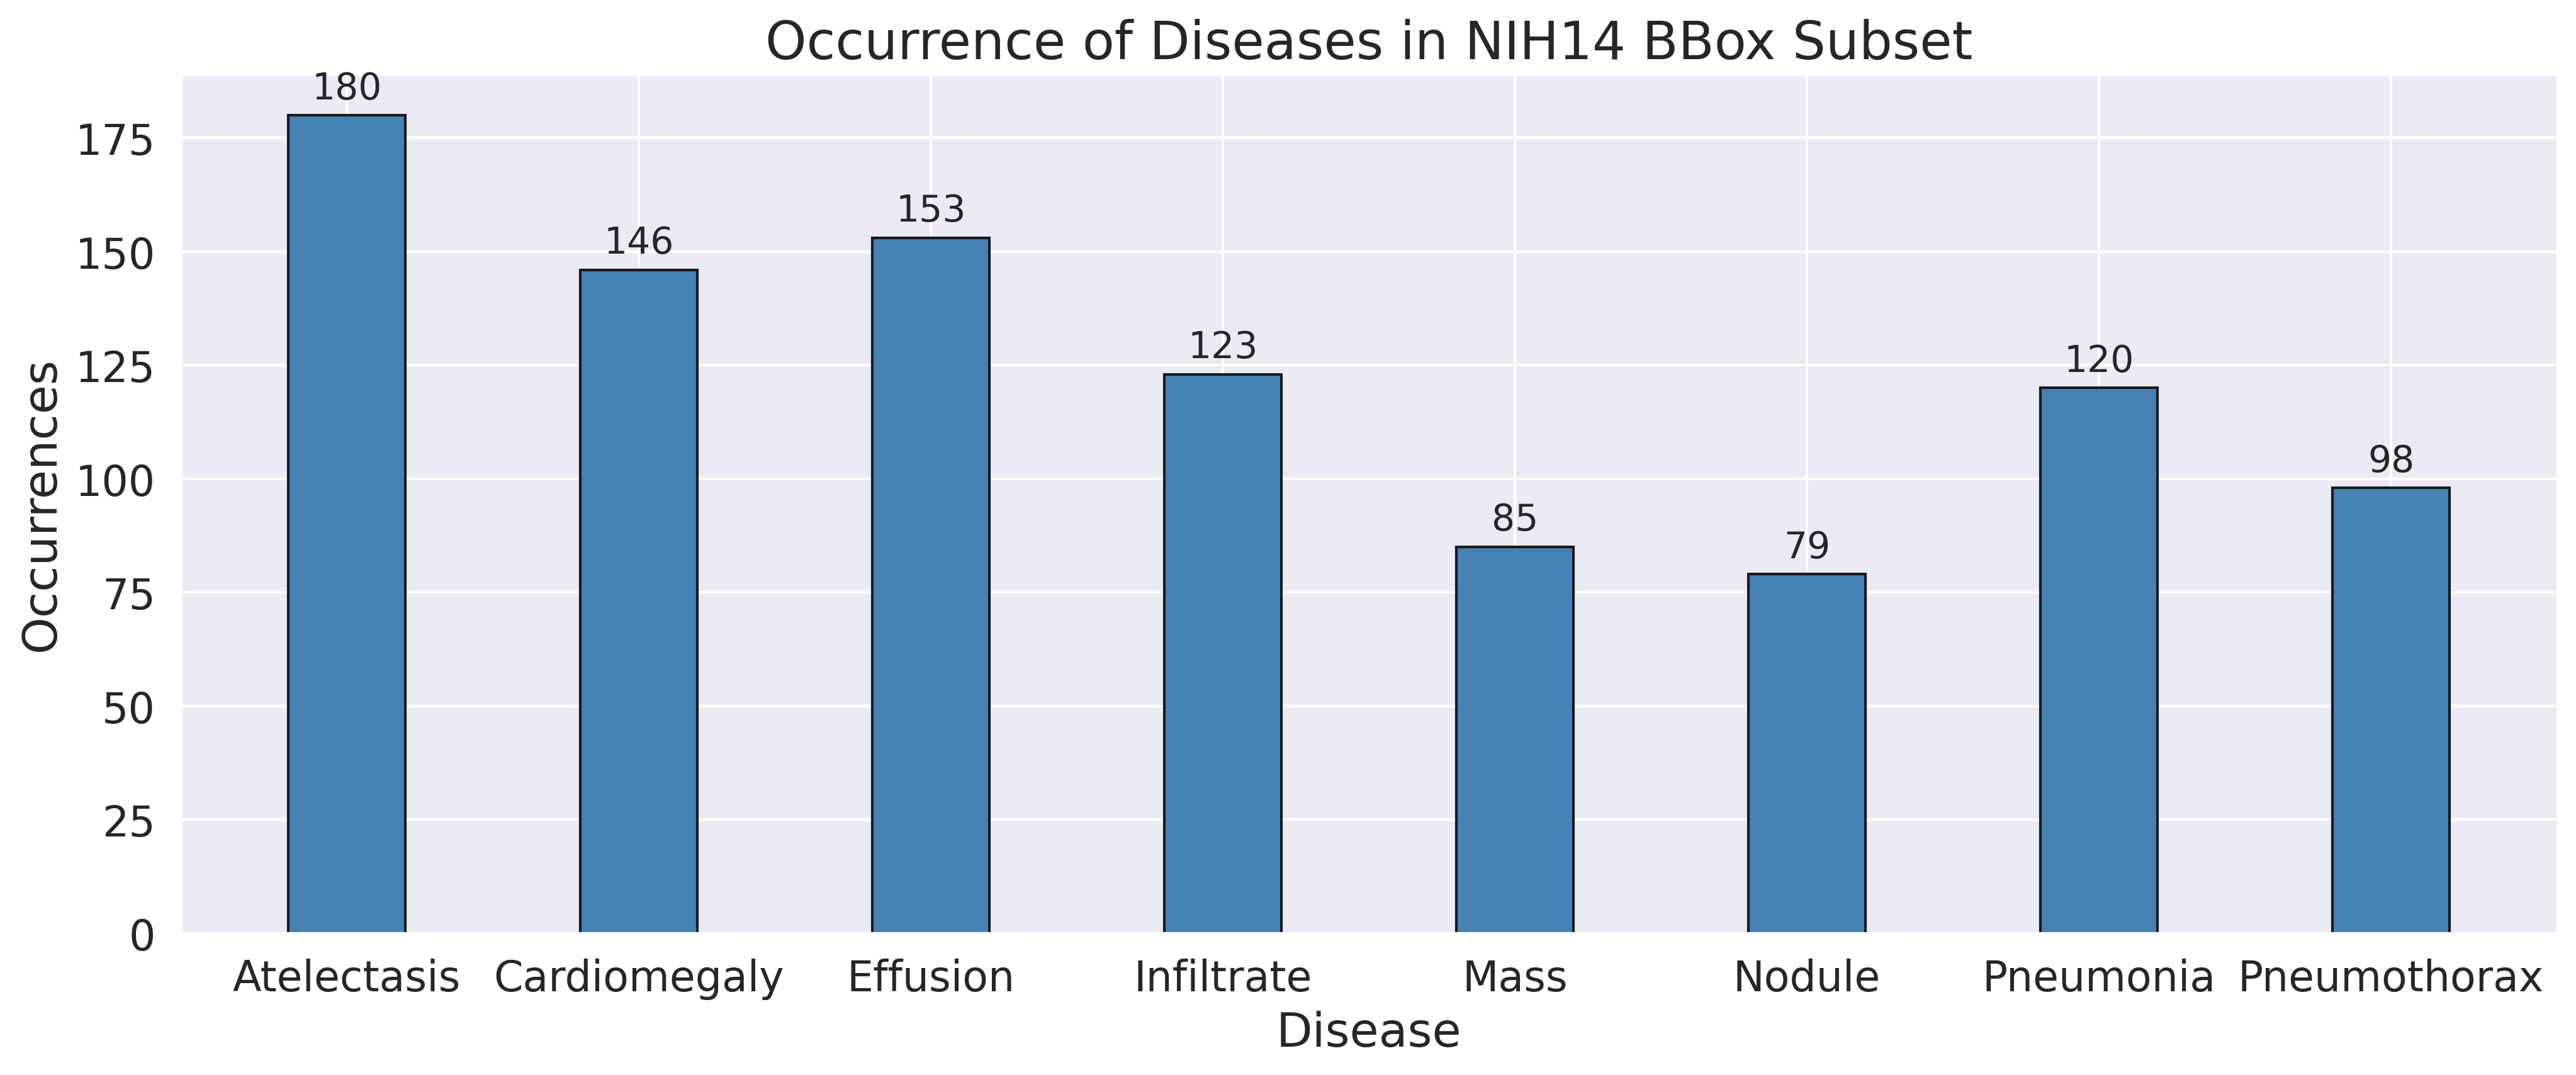

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset_folder = "../files/nih14_label"
bbox_csv_path = os.path.join(dataset_folder, "BBox_List_2017.csv")

bbox_list = []
img_name_list = []
img_label_list = []

with open(bbox_csv_path, "r") as f:
    lines = f.read().splitlines()[1:]  # Skip header

    for line in lines:
        parts = line.strip().split(",")
        if len(parts) < 6:
            continue
        img_name_list.append(parts[0])
        img_label_list.append(parts[1])
        bbox_list.append([float(x) for x in parts[2:6]])

# === print 10 rows check ===
print("First 10 bboxes:", bbox_list[:10])
print("First 10 image names:", img_name_list[:10])
print("First 10 image labels:", img_label_list[:10])

findings_list = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate',
                 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

from collections import Counter
label_counter = Counter(img_label_list)
num_list = [label_counter[disease] for disease in findings_list]

print("Total images with BBox:", len(img_name_list))
print("Disease Count Dict:", dict(zip(findings_list, num_list)))

# Plot
plt.figure(figsize=(14, 6), dpi=300)
bars = plt.bar(findings_list, num_list, color="steelblue", edgecolor="k", width=0.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval),
             ha="center", va="bottom", fontsize=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Disease", fontsize=18)
plt.ylabel("Occurrences", fontsize=18)
plt.title("Occurrence of Diseases in NIH14 BBox Subset", fontsize=20)
plt.tight_layout()
plt.show()

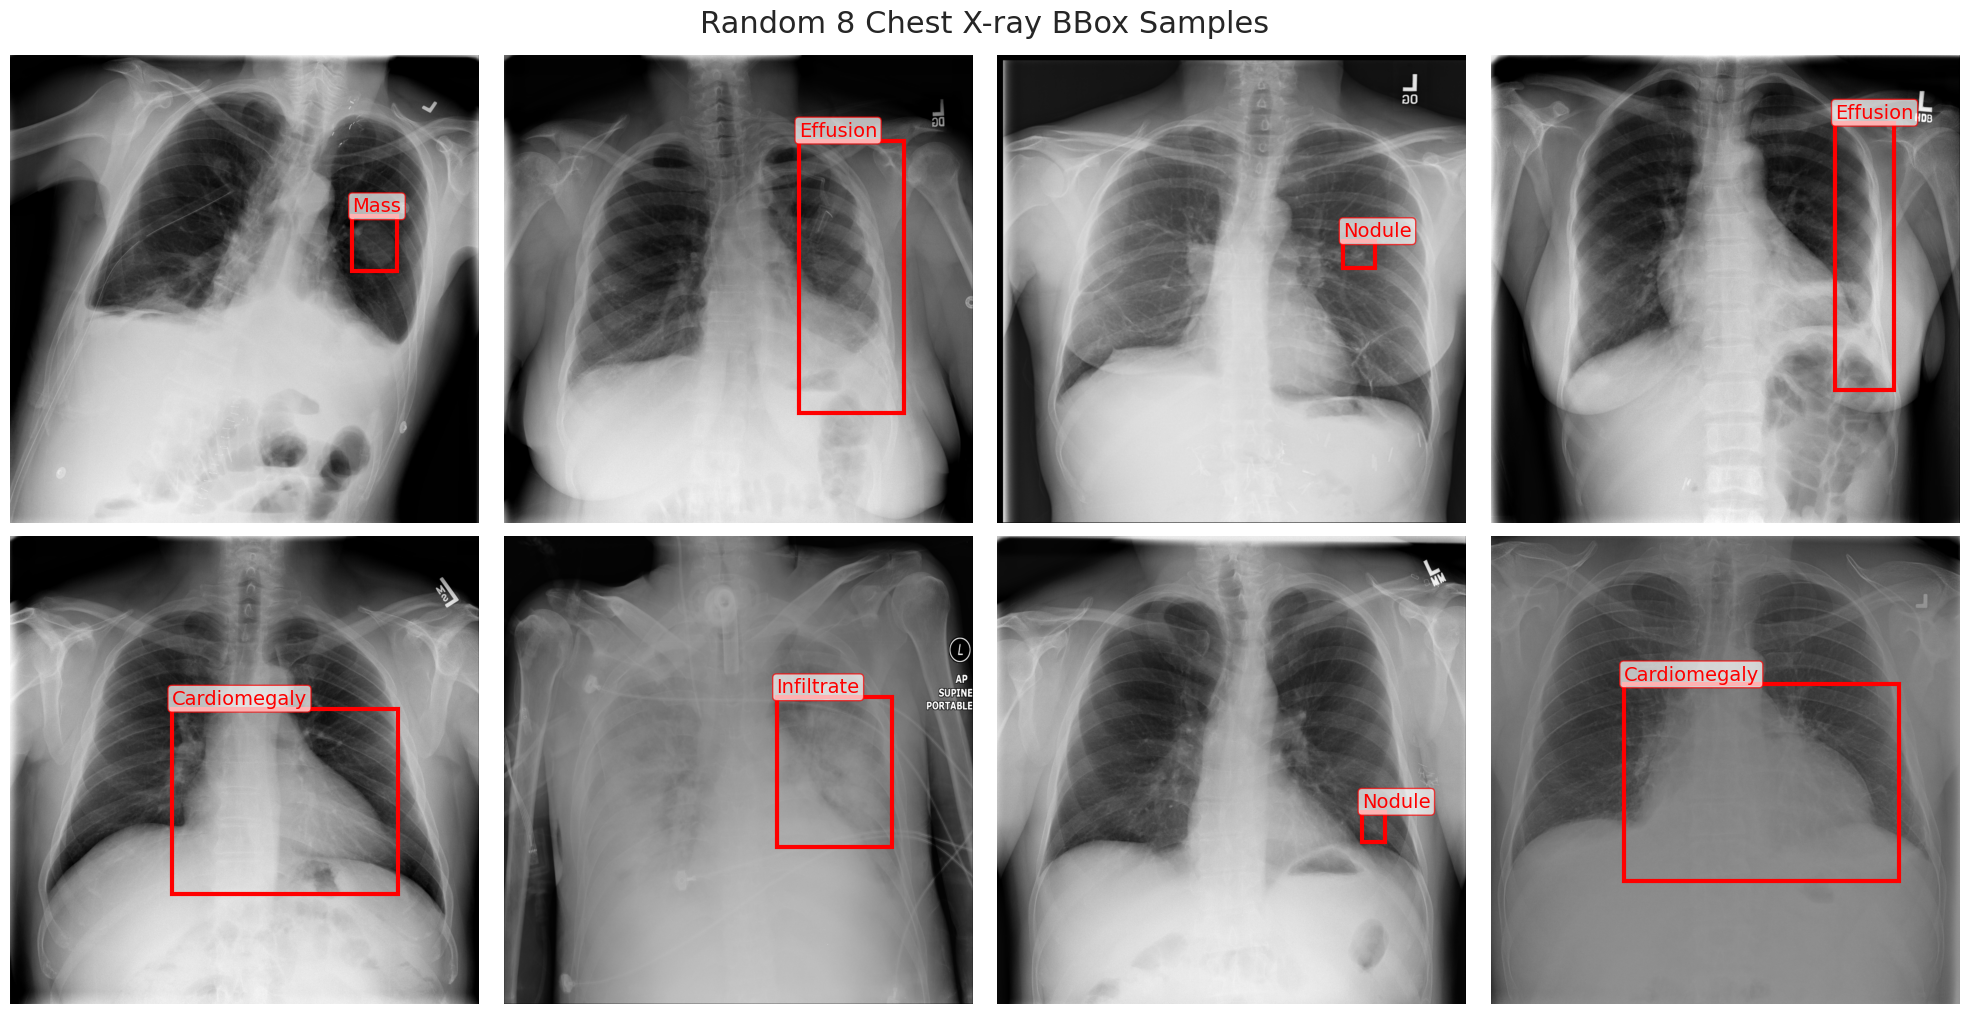

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# === Set random seed for reproducibility ===
random_seed = 42
random.seed(random_seed)

# === Paths ===
csv_path = "../files/nih14_label/BBox_List_2017.csv"
img_dir = "/home/mxz3935/dataset_folder/chest_x-ray_nih/images"

# === Load CSV ===
df = pd.read_csv(csv_path)  # Expecting columns: Image Index, Finding Label, x, y, w, h

# Drop rows with missing bbox values (columns 2,3,4,5)
df = df.dropna(subset=df.columns[2:6]).reset_index(drop=True)

# Convert bbox columns to float
df.iloc[:, 2:6] = df.iloc[:, 2:6].astype(float)

# Random sample 8 bbox entries
sampled_df = df.sample(n=8, random_state=random_seed).reset_index(drop=True)

# === Plot 2x4 grid ===
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    row = sampled_df.iloc[i]
    img_path = os.path.join(img_dir, row[df.columns[0]])  # Image filename column

    try:
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img, cmap="gray")
    except FileNotFoundError:
        print(f"Image not found: {img_path}")
        ax.axis("off")
        continue

    # Get bbox (x, y, w, h)
    x, y, w, h = row[df.columns[2]], row[df.columns[3]], row[df.columns[4]], row[df.columns[5]]

    # Draw bounding box
    rect = plt.Rectangle((x, y), w, h, edgecolor="red", linewidth=3, fill=False)
    ax.add_patch(rect)

    # Add label text above bbox
    ax.text(x, y - 10, row[df.columns[1]],
            fontsize=14, color="red",
            bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.2", alpha=0.7))

    ax.axis("off")

plt.tight_layout()
plt.suptitle("Random 8 Chest X-ray BBox Samples", fontsize=22, y=1.02)
plt.show()